In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline


# import plotly
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

# Load data

In [2]:
df_city_time_seris = pd.read_csv('./data/City_time_series.csv')
df_city_time_seris.head()

,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_cities_crosswalk = pd.read_csv('./data/cities_crosswalk.csv')
df_cities_crosswalk.head()

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI


# Value of all homes per square in different year
- mean of value of all homes per square foot
- It' seems like Zelow home value per square foot is higher in 2005 - 2009 and again high in 2017

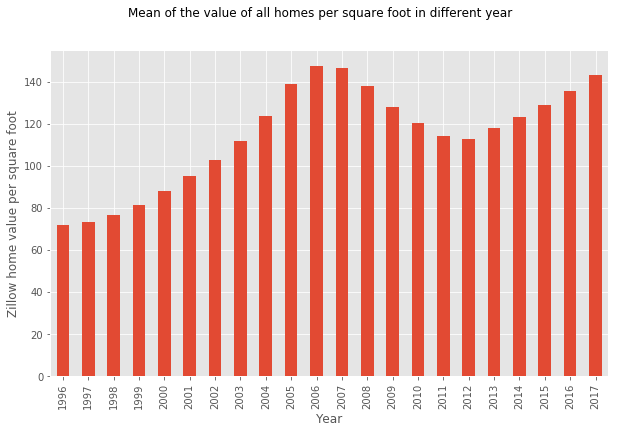

In [4]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the value of all homes per square foot in different year', fontsize=12)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

# Median of list prices per square foot in different year
- How median of list prices are calculated: Median of list prices divided by the square footage of a home
- It looks like list prices are high in 2017 compares to the previous year.




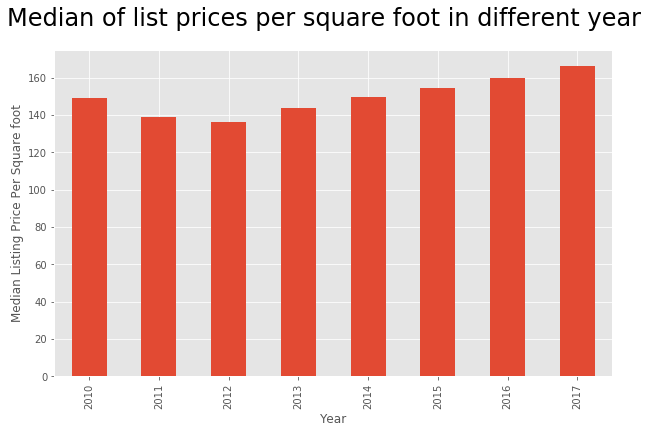

In [5]:
df_city_time_seris_without_null = df_city_time_seris.dropna(subset=['MedianListingPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null.groupby(df_city_time_seris_without_null.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of list prices per square foot in different year', fontsize=24)
plt.ylabel('Median Listing Price Per Square foot')
plt.xlabel('Year')
plt.show()

# Median of rental prices per square foot in different year
- How median of rental prices are calculated: Median of the rental price per square foot of homes listed for rent on Zillow in a given region

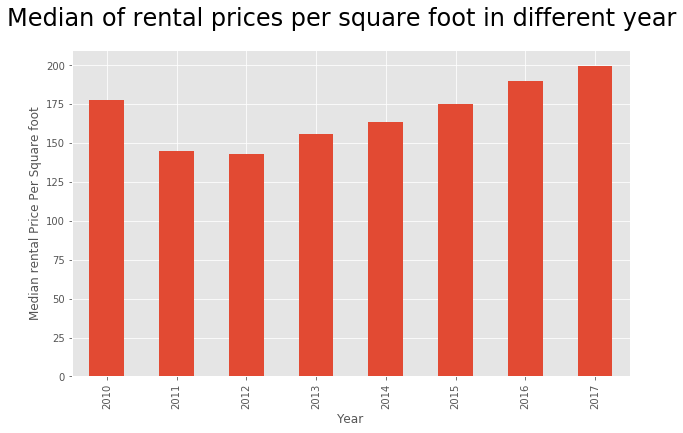

In [6]:
df_city_time_seris_without_null_rent = df_city_time_seris.dropna(subset=['MedianRentalPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null_rent.groupby(df_city_time_seris_without_null_rent.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of rental prices per square foot in different year', fontsize=24)
plt.ylabel('Median rental Price Per Square foot')
plt.xlabel('Year')
plt.show()

# Zillow's different home value in different year
- Zillow home differs from many housing types. Like 2, 3 or 4 bedrooms.
- It looks like the comparison of 2,3 and 4 bedroom house price is always same.

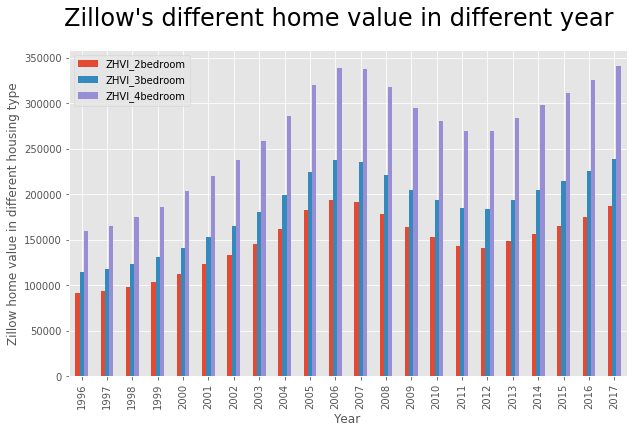

In [7]:
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)[['ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in different housing type')
plt.xlabel('Year')
plt.show()

# Median of the value of all homes per square foot in different states

In [8]:
# let's replace the regionName column value with State name from cities_crosswalk.csv
df_city_time_seris['RegionName'] = df_city_time_seris['RegionName'].map(df_cities_crosswalk.set_index('Unique_City_ID')['State'])
# group regionName with ZHVIpersqft mean value
df_regi_zhvi_sq_mean = df_city_time_seris.groupby(df_city_time_seris.RegionName)['ZHVIPerSqft_AllHomes'].mean().reset_index(name = "ZHVIpersqft_mean")
# drop null values
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.dropna(subset=['ZHVIpersqft_mean'], how='any')

In [9]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


# difine our data for plotting
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_regi_zhvi_sq_mean['RegionName'], # location (states)
        z = df_regi_zhvi_sq_mean['ZHVIpersqft_mean'].astype(float), # Zillow Home value per square foot
        locationmode = 'USA-states', # let's define the location mode to USA_states
        text = 'Median home value per square foot',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value per square foot")
        ) ]

layout = dict(
        title = 'Median of the value of all homes per square foot in different states<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )




    
fig = dict( data=data, layout=layout )
# let's plot
py.iplot( fig, filename='d3-cloropleth-map' )